In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
import numpy as np
import pandas as pd

data = pd.read_csv("./Patient_Statistics.csv", encoding="shift-jis")
data = data.dropna(how="any")
print(data.head(-1))
# print(data.dtypes)
for i in range(1,len(data.columns)):
    for j in range(len(data)):
        if isinstance(data.iloc[j,i], str):
            data.iloc[j,i] = int(data.iloc[j,i].replace(',', ''))
    data.iloc[:,i].astype(np.int32)
print(data.dtypes)

             日付 日本国内\n累計罹患者数 日本国内\n新規罹患者数 北海道  青森県  岩手県  宮城県  秋田県  山形県  福島県  \
1    2020/01/16            1            1   0  0.0  0.0  0.0  0.0  0.0  0.0   
2    2020/01/17            1            0   0  0.0  0.0  0.0  0.0  0.0  0.0   
3    2020/01/18            1            0   0  0.0  0.0  0.0  0.0  0.0  0.0   
4    2020/01/19            1            0   0  0.0  0.0  0.0  0.0  0.0  0.0   
5    2020/01/20            1            0   0  0.0  0.0  0.0  0.0  0.0  0.0   
..          ...          ...          ...  ..  ...  ...  ...  ...  ...  ...   
128  2020/05/22        16542           25   6  0.0  0.0  0.0  0.0  0.0  0.0   
129  2020/05/23        16568           26   9  0.0  0.0  0.0  0.0  0.0  0.0   
130  2020/05/24        16610           42  15  0.0  0.0  0.0  0.0  0.0  0.0   
131  2020/05/25        16631           21   3  0.0  0.0  0.0  0.0  0.0  0.0   
132  2020/05/26        16661           30   9  0.0  0.0  0.0  0.0  0.0  0.0   

     ...  愛媛県  高知県  福岡県  佐賀県  長崎県  熊本県  大分県  宮崎県  鹿

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


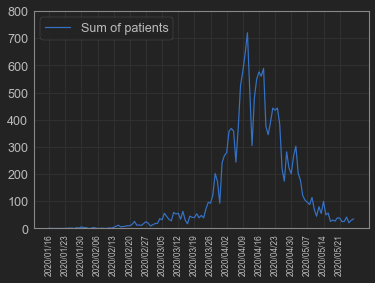

In [3]:
import matplotlib.pyplot as plt
fig = plt.Figure(figsize=(30,10))
x = data["日付"]
y = np.array(data["日本国内\n新規罹患者数"]).astype(int)
# print(y)
plt.xlabel = "日付"
plt.ylabel = "新感染者数"
plt.plot(x,y,label="Sum of patients")
plt.subplot().set_ylim([0,800])
plt.xticks(x[::7], rotation=90, size='small')
plt.legend(loc="upper left")
plt.show()

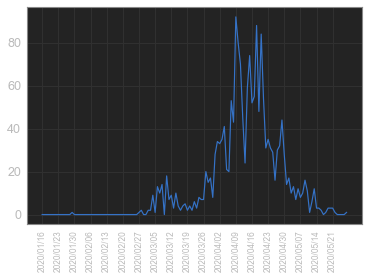

In [4]:
%matplotlib inline
x = data["日付"]
# print(data.head(2))
y = data["大阪府"]
plt.plot(x,y)
plt.xticks(x[::7], rotation=90, size='small')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train = [range(len(data))]
target = data["日本国内\n新規罹患者数"]
X_train, Y_train, X_valid, Y_valid = train_test_split(train,target,shuffle=False,test_size=0.05)
# print(X_train,X_valid)
# print(X_train.shape, Y_train.shape)

from sklearn import svm
svr = svm.SVR(C=155,kernel="rbf", epsilon=0.9)
svr.fit(X_train,X_valid)

# plot
pred1 = svr.predict(X_train).round(0)
pred2 =svr.predict(Y_train).round(0)

# print(sum(abs(X_valid-pred1))+sum(abs(Y_valid-pred2)))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = range(len(data))
# to date
# for i in range(len(data)):
#     x1.append(data.iat[i,0])
# for i in range(len(X_train)+len(Y_train)):
#     x2.append(data.iat[i,0])
    
y1 = target
y2 = np.concatenate([pred1, pred2])
ax.plot(x,y1)
ax.plot(x,y2,color="red")
# ax.set_xticklabels(x, rotation=90, size='small')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1, 133]

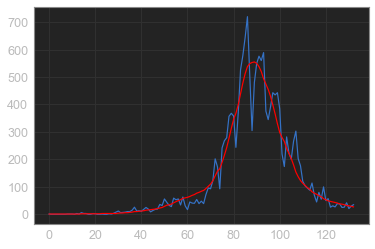

In [329]:
svr.fit(train,target)

pred = svr.predict(train).round(0)
# print(sum(abs(target-pred)))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = range(len(data))
# to date
# for i in range(len(data)):
#     x1.append(data.iat[i,0])
# for i in range(len(X_train)+len(Y_train)):
#     x2.append(data.iat[i,0])
    
y1 = target
y2 = pred
ax.plot(x,y1)
ax.plot(x,y2,color="red")
# ax.set_xticklabels(x, rotation=90, size='small')
plt.show()